<a href="https://colab.research.google.com/github/yewonlee5/yewonlee5.github.io/blob/main/Siamese%20Neural%20Networks%20(Thesis)/THESIS_1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Images from Cloud

In [ ]:
import os
import requests
from PIL import Image
import urllib.request
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
for a, b in zip( df['PartName'], df['SKU']):
  path = f"/content/drive/MyDrive/thesis/train_all/{a}/"
  isExist = os.path.exists(path)
  if not isExist:
    path = f"/content/drive/MyDrive/thesis/train_all/"
    makedirs(a, exist_ok=True)
  os.chdir(path)
  imgURL = f"https://res.cloudinary.com/us-auto-parts-network-inc/image/upload/images/{b}_1.png"
  try:
    urllib.request.urlretrieve(imgURL, f"{b}.png")
  except urllib.error.URLError as e: ResponseData = e.read().decode("utf8", "ignore")

# urllib.request.urlretrieve(imgURL, r"filename.jpg")

In [ ]:
# List of images

import os

path = r"/content/drive/MyDrive/thesis/train_all/"

os.walk(path)
# [x[0] for x in os.walk(path)]

<generator object _walk at 0x7f7f82bb63b0>

In [ ]:
with open('/content/drive/MyDrive/thesis/list_final.txt', 'w') as f:
    for path, subdirs, files in os.walk(path):
        for name in files:
          f.writelines(os.path.join(path, name))
          f.writelines('\n')

In [ ]:
# Remove Categories with a single image
file_path = f"/content/drive/MyDrive/thesis/remove.csv"  # Image file path

df_r = pd.read_csv(file_path)

print(df_r)

                              Labels  Count
0           4WD Hub Locking Solenoid      1
1             A C Blower Motor Wheel      1
2      A C Compressor By-Pass Pulley      1
3          A C Compressor Clutch Hub      1
4         A C Compressor Clutch Shim      1
..                               ...    ...
339              Windshield Hardware      1
340             Windshield Seal Clip      1
341  Windshield Washer Reservoir Cap      1
342            Wiper Linkage Bushing      1
343                      Yoke Washer      1

[344 rows x 2 columns]


In [ ]:
df_r.iloc[0:, 0]

0             4WD Hub Locking Solenoid
1               A C Blower Motor Wheel
2        A C Compressor By-Pass Pulley
3            A C Compressor Clutch Hub
4           A C Compressor Clutch Shim
                    ...               
339                Windshield Hardware
340               Windshield Seal Clip
341    Windshield Washer Reservoir Cap
342              Wiper Linkage Bushing
343                        Yoke Washer
Name: Labels, Length: 344, dtype: object

In [ ]:
import shutil

for j in df_r.iloc[:, 0]:

  remove_dir_path = f"/content/drive/MyDrive/thesis/train_all/{j}/"
  shutil.rmtree(remove_dir_path, ignore_errors=False, onerror=None)

# EDA (Exploratory Data Analysis)

In [ ]:
import os

# List of Category
path = r"/content/drive/MyDrive/thesis/train/"

dir_list = os.listdir(path)

In [ ]:
import pandas as pd

cat=[]
file = []

for aa in dir_list:
  path = f"/content/drive/MyDrive/thesis/train/{aa}/"
  for path, subdirs, files in os.walk(path):
    for name in files:
      cat.append(aa)
      file.append(os.path.join(name))


df_cat = pd.DataFrame(
    {'cat': cat,
     'file': file
    })

df_cat

,cat,file
0,Shock Absorber and Strut Assembly,TS272313.png
1,Shock Absorber and Strut Assembly,TS181141.png
2,Shock Absorber and Strut Assembly,TS172619.png
3,Shock Absorber and Strut Assembly,TS182322R.png
4,Shock Absorber and Strut Assembly,TS172647.png
...,...,...
15160,Axle Assembly,A1666240.png
15161,Axle Assembly,A1603357.png
15162,Axle Assembly,REPCHO8058.png
15163,Axle Assembly,A1662147.png


In [ ]:
df_cat = df_cat.groupby(['cat']).count().sort_values(by = 'file', ascending = False)

In [ ]:
df_cat.rename(columns = {'file':'Number of images'}, inplace = True)

df_cat

,Number of images
cat,
Bumper Cover,952
Mirror,920
Headlight,761
Brake Disc,741
Fender Liner,557
...,...
Flashlight,2
Tire Pressure Gauge,2
Trailer Brake Control,2


In [ ]:
df_cat.to_csv('/content/drive/MyDrive/thesis/df_final_category.csv')

In [ ]:
import pandas as pd

df_cat = pd.read_csv('/content/drive/MyDrive/thesis/df_final_category.csv')

<Figure size 1600x1400 with 0 Axes>

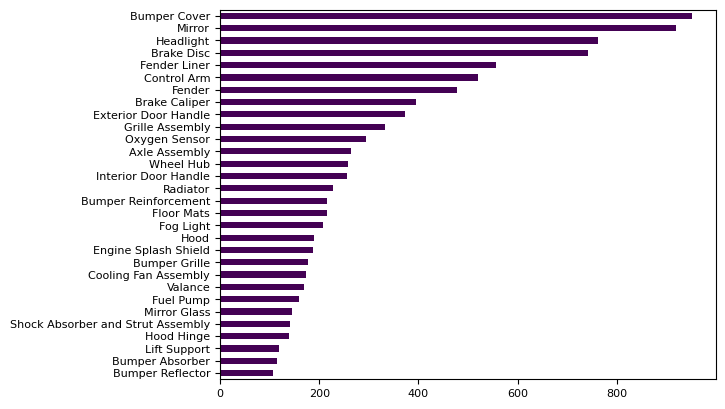

In [ ]:
import matplotlib.pyplot as plt

y=df_cat[:30].iloc[:,0]

my_cmap = plt.get_cmap("viridis")

plt.figure(figsize=(16, 14))
df_cat[:30].set_index('cat').sort_values(by='Number of images', ascending = True).plot.barh(ylabel='',fontsize=8, color=my_cmap.colors, legend=False)
plt.show()

In [ ]:
df_cat_30 = df_cat[:30].sort_values(by='Number of images', ascending = False)
df_cat_30.sum()

cat                 Bumper CoverMirrorHeadlightBrake DiscFender Li...
Number of images                                                 9789
dtype: object

# PCA (Principal Component Analysis) for the top 30 categories

In [ ]:
import os

l = []

for i in list(df_cat_30.cat):
  path = f"/content/drive/MyDrive/thesis/train/{i}/"

  for path, subdirs, files in os.walk(path):
    for name in files:
      l.append(os.path.join(path, name))


In [ ]:
# labels?
target = []
for path in l:
  temp_list = path.split("/")
  target.append(temp_list[-2])

print(target)

['Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper Cover', 'Bumper

In [ ]:
# resize & grayscale


import numpy as np
from PIL import Image

images = []
inputs = []

imageshape = (100,100)


for i in range(len(l)):
  img = Image.open(l[i]).resize(imageshape).convert('L')
  images.append(img)
  arr = np.array(img)

  # make a 1-dimensional view of arr
  flat_arr = arr.ravel()

  # convert to a matrix
  v = np.matrix(flat_arr)

  inputs.append(v)

inputs = np.squeeze(np.asarray(inputs))

inputs[1].shape

(10000,)

In [ ]:
# import library
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# PCA transformation and reduce the dimension from 10000 to 500
m = 500

pca = PCA(n_components=m, whiten=True)

In [ ]:
inputs.shape

(9789, 10000)

In [ ]:
X_train_fit = pca.fit_transform(inputs) # Principal Components
principalDf =pd.DataFrame(data = X_train_fit)

label = pd.DataFrame(list(target))
principalDf = pd.concat([principalDf, label], axis = 1, join='inner', ignore_index=True)

# column names
columns = []
for i in range(m):
  columns.append(f"principalcomponent{i+1}")
columns.append("label")

principalDf.columns = columns
print(principalDf.iloc[:,list(range(5)) + [-1]]) # first 5 CPs and label
print(X_train_fit.shape)

      principalcomponent1  principalcomponent2  principalcomponent3  \
0                2.107338            -0.515969            -0.700139   
1                2.111318            -0.414473            -0.473152   
2                2.066313            -0.389459            -0.514532   
3                2.132744            -0.567846            -0.629873   
4                2.041308            -0.188605            -0.350879   
...                   ...                  ...                  ...   
9784             1.063024            -1.090583            -0.696634   
9785             0.540999            -1.010095            -1.153097   
9786             0.510160            -1.102156            -0.730010   
9787             0.396509            -1.146314            -0.892210   
9788             0.294807            -1.945592             0.808375   

      principalcomponent4  principalcomponent5             label  
0                0.928555            -0.004603      Bumper Cover  
1            

<ipython-input-39-701c7c1745ba>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


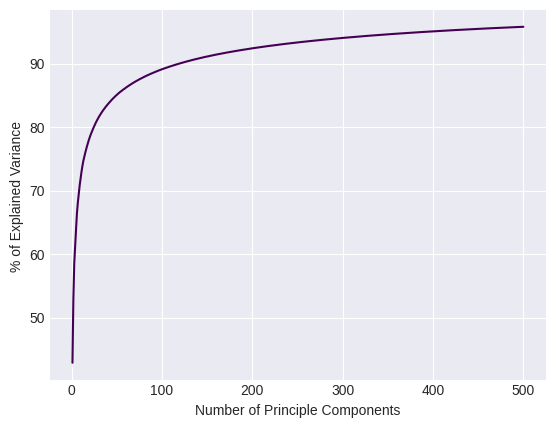

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")

# plt.figure(figsize=(8, 8))

plt.plot(range(1,m+1), (pca.explained_variance_ratio_.cumsum())*100, color='#440154')
# plt.title('Explained Variance',fontsize=15)
plt.xlabel('Number of Principle Components', fontsize=10)
plt.ylabel('% of Explained Variance ', fontsize=10)
plt.show()

In [ ]:
pca.explained_variance_ratio_.cumsum()[[99, 199, 299, 399, 499]]

array([0.89113122, 0.92409156, 0.94043393, 0.95077102, 0.95795801])

95.8% of variance is explained by the first 500 principal components.

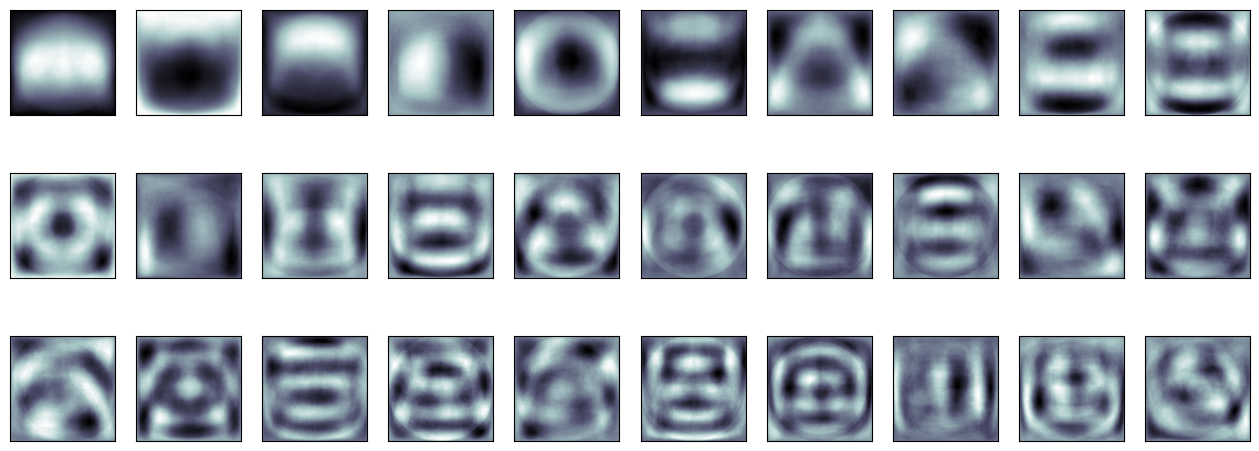

In [ ]:
# convert to image
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(imageshape),
              cmap=plt.cm.bone)

# Split Train-Test set

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os

path = f"/content/drive/MyDrive/thesis/"
os.chdir(path)

In [ ]:
# https://pypi.org/project/split-folders/
# 352 categories # 15165 images

import splitfolders
splitfolders.ratio('train', output="output2", seed=1337, ratio=(0.8, 0.1, 0.1))

In [ ]:
# remove directories if empty (val)

path = f"/content/drive/MyDrive/thesis/output/val/"
folders = list(os.walk(path))[1:]

for folder in folders:
    if not folder[2]:
        os.rmdir(folder[0])

In [ ]:
# How many training data?
path = r"/content/drive/MyDrive/thesis/output/train/"

l=[]
for path, subdirs, files in os.walk(path):
  for name in files:
    l.append(os.path.join(path, name))

len(l)

In [ ]:
# How many validating data?
path = r"/content/drive/MyDrive/thesis/output/val/"

l=[]
for path, subdirs, files in os.walk(path):
  for name in files:
    l.append(os.path.join(path, name))

len(l)

In [ ]:
# How many testing data?
path = r"/content/drive/MyDrive/thesis/output/test/"

l=[]
for path, subdirs, files in os.walk(path):
  for name in files:
    l.append(os.path.join(path, name))

len(l)

1811

# Preprocessing the images

## White Padding

In [ ]:
import albumentations as albu
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

transform = albu.LongestMaxSize(max_size=300, interpolation=1, p=1) #default interpolation is INTER_LINEAR
transform2 = albu.PadIfNeeded(min_height=300, min_width=300, border_mode=0, value=(255,255,255))

image = np.array(Image.open(r"/content/drive/MyDrive/thesis/train/Fender Trim/RM22130008.png"))
image = transform(image=image)['image']
image = transform2(image=image)['image']

# Now the image is preprocessed and ready to be accepted by the model

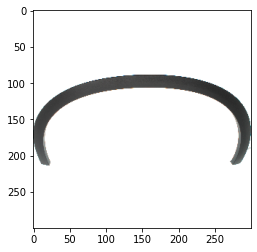

In [ ]:
plt.imshow(image)
plt.show()

## Image Augmentation (not applied in real data)

In [ ]:
pip install augly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 KB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31547 sha256=312b5fc6d1dc7cb6985a363ceaeec9efe2faba2293e5f5b07d6bb3edb8450a29
  Stored in directory: /root/.cache/pip/wheels/c1/13/6d/441d8f2af76ee6d2a3e67eebb1d0c556fefcee0a8b32266a8e
Successfully built iopath


In [ ]:
import os
import augly.image as imaugs
import augly.utils as utils
from IPython.display import display

In [ ]:
# for path, subdirs, files in os.walk(path):
#   for name in files:

img = '/content/drive/MyDrive/thesis/train/Back Up Light/RH73130005.png'

In [ ]:
from pathlib import Path

def skew(img):
  # name
  filename = Path(img).stem
  filepath = Path(img).parents[0]
  # horizontal flip
  image_h = imaugs.hflip(img, output_path=f"{filepath}/{filename}_horizontal.png")
  # vertical flip
  image_v= imaugs.vflip(img, output_path=f"{filepath}/{filename}_vertical.png")
  # Image skew
  image_s1 = imaugs.skew(img, output_path=f"{filepath}/{filename}_skew1.png", skew_factor=1)
  image_s2 = imaugs.skew(image_h, output_path=f"{filepath}/{filename}_skew2.png", skew_factor=-1)


In [ ]:
skew(img)

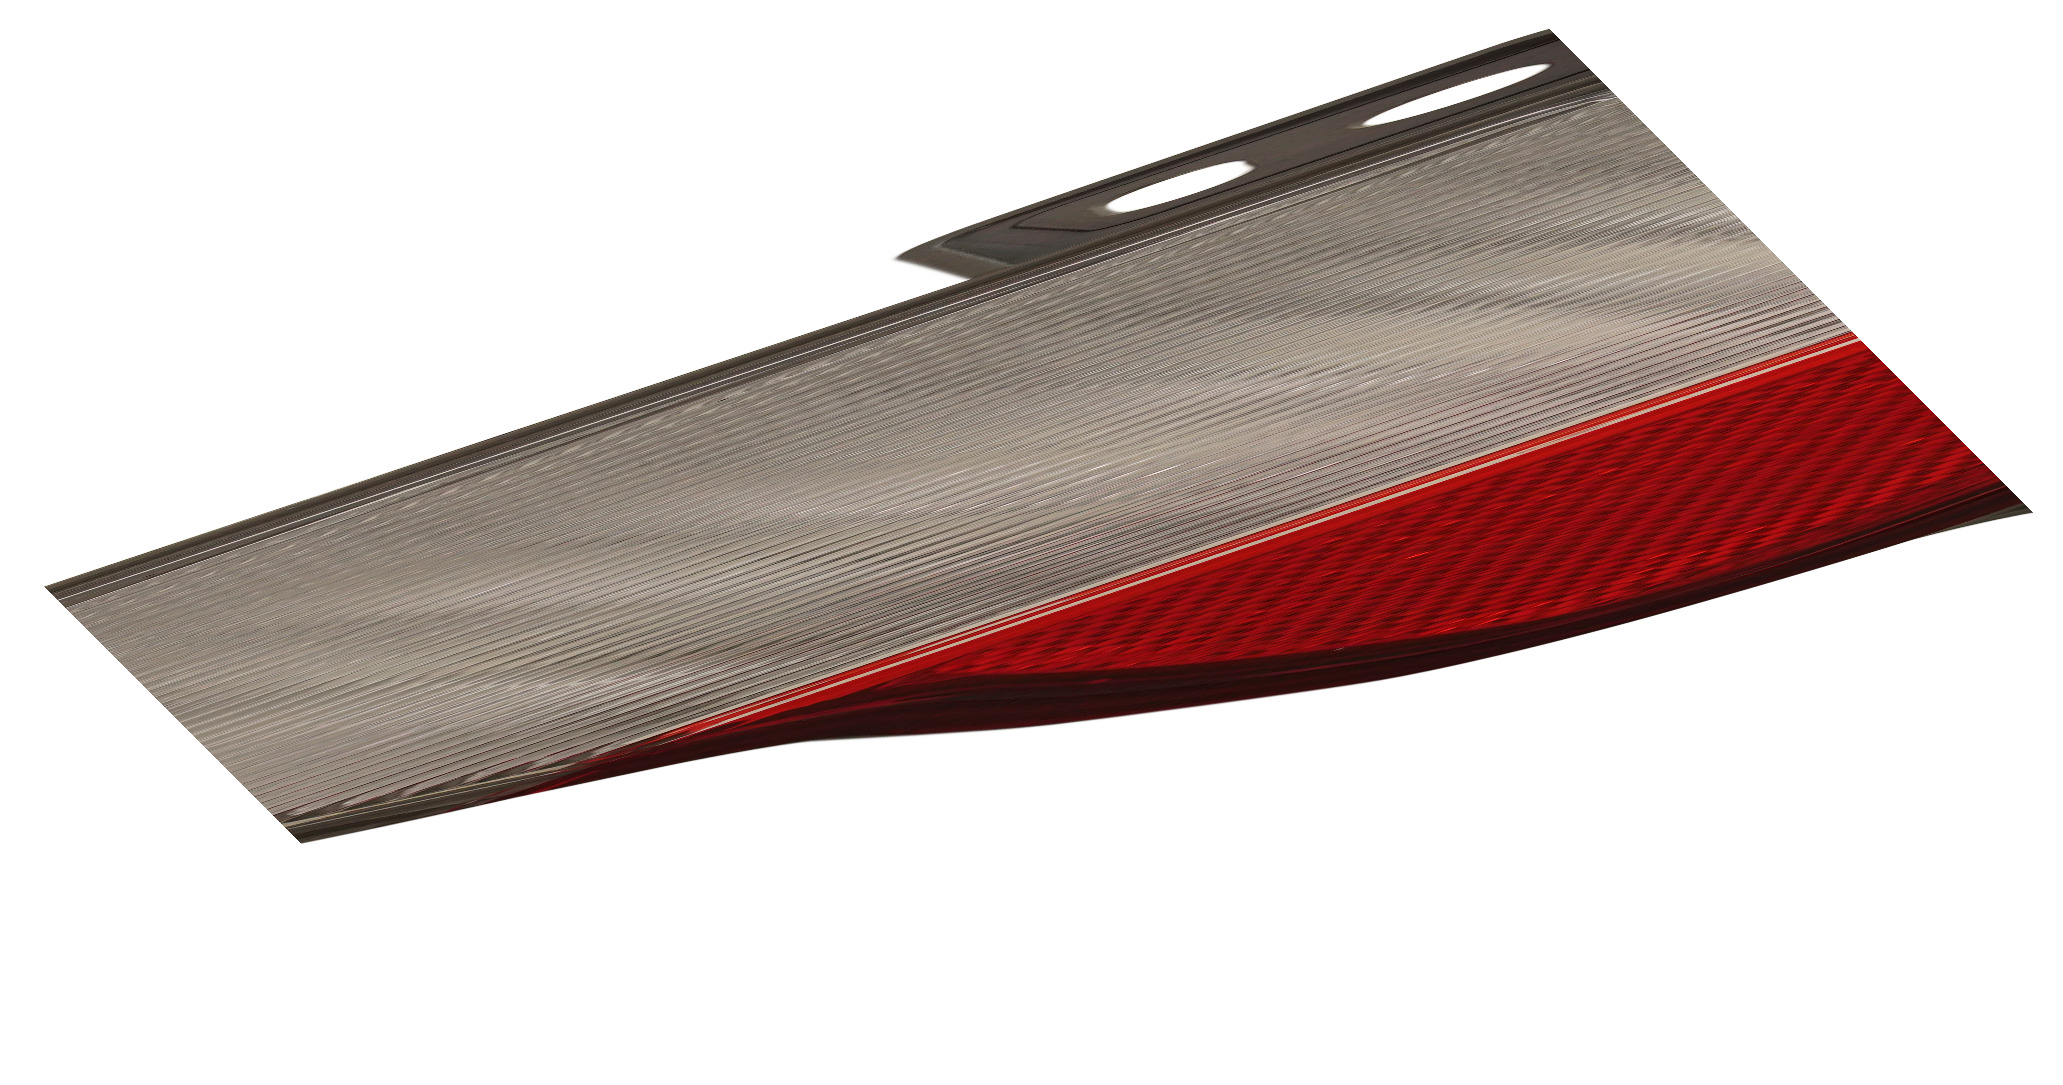

In [ ]:
image_s2 = imaugs.skew(image, skew_factor=-1)
display(image_s2)

In [ ]:
import os
import augly.image as imaugs
import augly.utils as utils
from IPython.display import display
import torchvision.transforms as transforms
from PIL import Image
import PIL.ImageOps

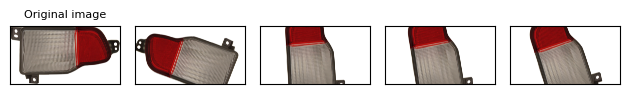

In [ ]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T

def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

orig_img = Image.open('/content/drive/MyDrive/thesis/train/Back Up Light/RH73130005.png')


rotater = T.RandomRotation(degrees=(0, 360))
rotated_imgs = [rotater(orig_img) for _ in range(4)]
plot(rotated_imgs)